# Some Random SymPy Stuff

In [1]:
import sympy as sp
sp.init_printing()

# for older SymPy versions:
#%load_ext sympy.interactive.ipythonprinting

# for even older IPython/SymPy versions:
#%load_ext sympyprinting

In [2]:
x, y = sp.symbols("x y")

In [3]:
(sp.pi + x) ** 2

In [4]:
expr = ((x + y)**2 * (x + 1))
expr

In [5]:
sp.expand(expr)

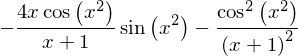

In [6]:
sp.diff(sp.cos(x**2)**2 / (1 + x), x)

In [7]:
x = sp.symbols('x', positive=True)
x > 0

In [8]:
sp.exp(sp.I * sp.pi)

In [9]:
sp.oo

In [10]:
a, b, c = sp.symbols("a, b, c")

In [11]:
sp.expand(sp.sin(a + b))

In [12]:
sp.expand(sp.sin(a + b), trig=True)

In [13]:
sp.simplify(sp.sin(x)**2 + sp.cos(x)**2)

In [14]:
sp.factor(x**3 + 6 * x**2 + 11*x + 6)

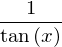

In [15]:
sp.simplify(sp.cos(x) / sp.sin(x))

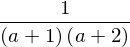

In [16]:
expr1 = 1 / ((a + 1) * (a + 2))
expr1

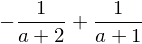

In [17]:
sp.apart(expr1)

In [18]:
z = sp.symbols('z')

In [19]:
f = sp.sin(x * y) + sp.cos(y * z)
f

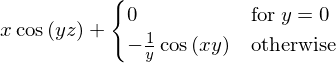

In [20]:
sp.integrate(f, x)

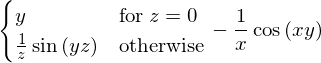

In [21]:
sp.integrate(f, y)

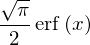

In [22]:
sp.integrate(sp.exp(-x**2), x)

In [23]:
sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo))

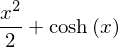

In [24]:
sp.integrate(x + sp.sinh(x), x)

In [25]:
sp.diff(_, x)

In [26]:
sp.limit(sp.sin(sp.pi * x) / x, x, 0)

In [27]:
4 * sp.atan(1)

In [28]:
n = sp.symbols('n')

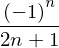

In [29]:
expr = (-1)**n / (2 * n + 1)
expr

In [30]:
sp.summation(expr, (n, 0, sp.oo))

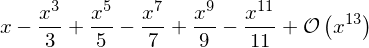

In [31]:
sp.series(sp.atan(x), x, n=13)

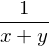

In [32]:
expr = 1 / (x + y)
expr

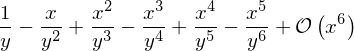

In [33]:
expr.series(x)

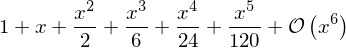

In [34]:
sp.series(sp.exp(x), x)

In [35]:
sp.summation(1 / sp.factorial(n), (n, 0, sp.oo))

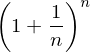

In [36]:
expr = (1 + 1/n) ** n
expr

In [37]:
sp.limit(expr, n, sp.oo)

In [38]:
sp.pi.evalf(100)

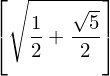

In [39]:
sp.solve(x**4 - x**2 - 1, x)

In [40]:
sp.solve([x + y - 1, x - y - 1], [x,y])

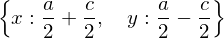

In [41]:
sp.solve([x + y - a, x - y - c], [x,y])

In [42]:
sp.symbols('m:q')

In [43]:
sp.symbols('r:5')

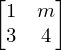

In [44]:
m = sp.symbols('m')
M = sp.Matrix([[1, m], [3, 4]])
M

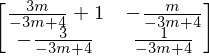

In [45]:
M.inv()

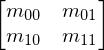

In [46]:
A = sp.Matrix(sp.symbols("m:2:2")).reshape(2, 2)
A

In [47]:
A[1, 0]

In [48]:
b = sp.Matrix(sp.symbols("b:2"))
b

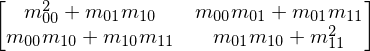

In [49]:
A**2

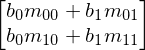

In [50]:
A * b

In [51]:
A.det()

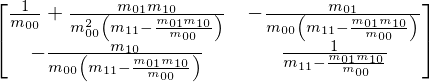

In [52]:
A.inv()

from https://github.com/sympy/sympy/wiki/Matrices-eigenvalues

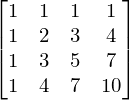

In [53]:
M = sp.Matrix(4, 4, lambda i, j: i * j + 1)
M

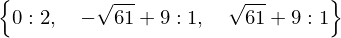

In [54]:
M.eigenvals()

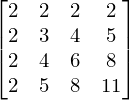

In [55]:
M = sp.Matrix(4, 4, lambda i, j: i * j + 2)
M

In [56]:
M.eigenvals()

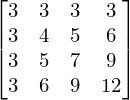

In [57]:
M = sp.Matrix(4, 4, lambda i, j: i * j + 3)
M

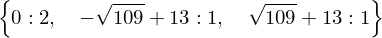

In [58]:
M.eigenvals()

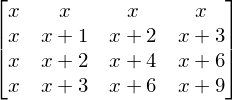

In [59]:
x = sp.symbols('x')
M = sp.Matrix(4, 4, lambda i, j: i * j + x)
M

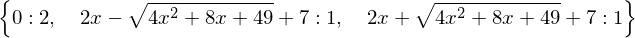

In [60]:
M.eigenvals()

from https://groups.google.com/forum/#!topic/sympy/mISLFQcEUIM

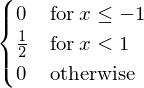

In [61]:
f = sp.Piecewise((0, x <= -1), (sp.Rational(1, 2), x < 1), (0, True))
f

In [62]:
#sp.integrate(f.subs(x, x - y) * f(x), y)

In [63]:
sp.integrate(sp.Heaviside(x + 1) / 2 - sp.Heaviside(x - 1) / 2, (x, -10, -5))

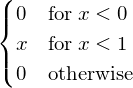

In [64]:
q = sp.Piecewise((0, x < 0), (x, x < 1), (0, True))
q

In [65]:
q.args

from https://groups.google.com/forum/#!topic/sympy/tt8IA3y2sfQ

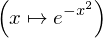

In [66]:
f = sp.Lambda(x, sp.exp(-x**2))
f

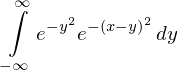

In [67]:
conv = sp.Integral(f(x-y)*f(y), (y, -sp.oo, sp.oo))
conv

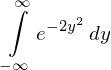

In [68]:
conv.subs(x, 0)

In [69]:
l = sp.lambdify(x, sp.Integral(f(x), (x, -sp.oo, sp.oo)))
#l(3) # doesn't work!
l

<function numpy.<lambda>>

In [70]:
l = sp.lambdify(x, sp.Integral(f(x), (x, -sp.oo, sp.oo)), "sympy")
l

<function <lambda>>

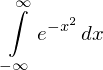

In [71]:
l(x)

from http://www.mare.ee/indrek/misc/convolution.pdf

In [72]:
# Convolute two "one-piece" functions. Arguments F and G
# are tuples in form (h(x) , a_h, b_h), where h(x) is
# the function and [a_h, b_h) is the range where the functions
# are non-zero.
def convolute_onepiece(x, F, G):
    f, a_f, b_f = F
    g, a_g, b_g = G
    f = sp.S(f)
    g = sp.S(g)
    # make sure ranges are in order, swap values if necessary
    if b_f - a_f > b_g - a_g:
        f, a_f, b_f, g, a_g, b_g = g, a_g, b_g, f, a_f, b_f
    y = sp.Dummy('y')
    i = sp.integrate(f.subs(x, y) * g.subs(x, x-y), y)
    return [
        (i.subs(y, x-a_g) - i.subs(y, a_f), a_f+a_g, b_f+a_g),
        (i.subs(y, b_f) - i.subs(y, a_f), b_f+a_g, a_f+b_g),
        (i.subs(y, b_f) - i.subs(y, x-b_g), a_f+b_g, b_f+b_g) ]

In [73]:
# Two "flat" functions, uniform centered PDFs
F = 0.5, -1, 1
G = 0.05, -10, 10
convolute_onepiece(sp.abc.x, F, G)

from https://github.com/fperez/sympy/blob/master/sympy/solvers/tests/test_pde.py

In [74]:
from sympy import Derivative as D

In [75]:
x, y, z, t = sp.symbols("x y z t")
c = sp.symbols("c", real=True)
Phi = sp.Function('Phi')
F, R, T, X, Y, Z, u = map(sp.Function, 'FRTXYZu')
r, theta, z = sp.symbols('r theta z')

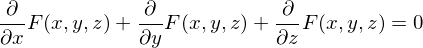

In [76]:
eq = sp.Eq(D(F(x, y, z), x) + D(F(x, y, z), y) + D(F(x, y, z), z))
eq

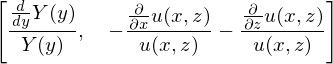

In [77]:
sp.pde_separate_mul(eq, F(x, y, z), [Y(y), u(x, z)])

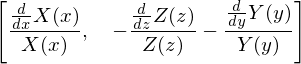

In [78]:
sp.pde_separate_mul(eq, F(x, y, z), [X(x), Y(y), Z(z)])

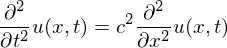

In [79]:
# wave equation
wave = sp.Eq(D(u(x, t), t, t), c**2*D(u(x, t), x, x))
wave

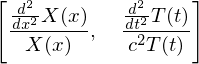

In [80]:
sp.pde_separate_mul(wave, u(x, t), [X(x), T(t)])

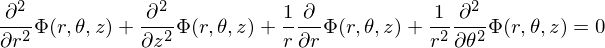

In [81]:
# Laplace equation in cylindrical coords
eq = sp.Eq(1/r * D(Phi(r, theta, z), r) + D(Phi(r, theta, z), r, 2) +
           1/r**2 * D(Phi(r, theta, z), theta, 2) + D(Phi(r, theta, z), z, 2))
eq

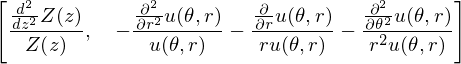

In [82]:
# Separate z
sp.pde_separate_mul(eq, Phi(r, theta, z), [Z(z), u(theta, r)])

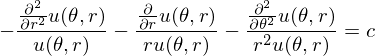

In [83]:
# Lets use the result to create a new equation...
eq = sp.Eq(_[1], c)
eq

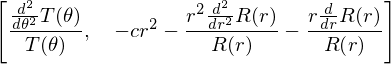

In [84]:
# ...and separate theta...
sp.pde_separate_mul(eq, u(theta, r), [T(theta), R(r)])

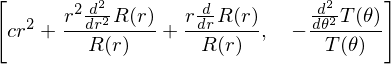

In [85]:
# ...or r...
sp.pde_separate_mul(eq, u(theta, r), [R(r), T(theta)])

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span resource="[_:publisher]" rel="dct:publisher">
    <span property="dct:title">Matthias Geier</span></span>
  has waived all copyright and related or neighboring rights to
  this work.
</p>